# Image Classification - Cats & Dogs


### AIM - Weekend Hackathon : 11

https://www.machinehack.com/hackathons/5f05b7e78842ae057f62ece5


**Overview**


In this hackathon, you will be provided with images of cats and dogs and you must use  your Computer Vision skills to build an image classifier to classify an image as that of a dog or of a cat. In this supervised image classification task, your goal is to classify the images into their respective classes using accuracy as a metric. The Dogs vs Cats is a classic dataset and has been used to train and evaluate models for binary classification tasks. With today's State-of-the-art Computer Vision models, we expect all the participants to achieve an accuracy of more than 90%.

**Data :**

Train (Folder): contains 9471 images of cats and dogs
Test (Folder): contains 4059 images of cats and dogs
Sample_Submission.csv : The format of submission accepted
Train.csv : contains the file name and appropriate category for each image in the train data
Test.csv : contains the file name for each image in the test data


*References*

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html



In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import shutil 
import os
print(os.listdir("../Data"))

['.DS_Store', '.ipynb_checkpoints', 'ImageClassification_AIM_Hackathon#11.ipynb', 'ImageClassification_Cats_Dogs_AIM_Hackathon#11.ipynb', 'ImageClassification_Cats_Dogs_AIM_Hackathon#11_v2.ipynb', 'model_cats_dogs.h5', 'Sample_Submission.csv', 'script.py', 'submission_v1.csv', 'Test', 'Train', 'Train.csv']


In [2]:
print("numpy version: ",np.__version__)
print("pandas version: ",pd.__version__)
#print("matplotlib version: ",matplotlib.__version__)
#print("keras version: ",keras.preprocessing.image.__version__)
#print("scikit version: ",sklearn.__version__)

numpy version:  1.18.4
pandas version:  0.25.1


In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
folder = '../Data/Train/Labeled_Images/'
if not os.path.exists(folder):
    os.makedirs(folder)
    
dataset_path_final = folder    

In [5]:
dog_dataset_path_initial = "../Data/Train/Dogs/"

for count,filename in enumerate(os.listdir(dog_dataset_path_initial)): 
    source = dog_dataset_path_initial + filename 
    destination = dataset_path_final + "dog." + filename
    try: 
        shutil.copyfile(source, destination) 
        print("File copied successfully.") 
        
    except shutil.SameFileError: 
        print("Source and destination represents the same file.") 

    except IsADirectoryError: 
        print("Destination is a directory.") 
  
    except PermissionError: 
        print("Permission denied.") 
 
    except: 
        print("Error occurred while copying file.") 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [6]:
cat_dataset_path_initial = "../Data/Train/Cats/"

for count,filename in enumerate(os.listdir(cat_dataset_path_initial)): 
    
    source = cat_dataset_path_initial + filename 
    destination = dataset_path_final + "cat." + filename 
    
    try: 
        shutil.copyfile(source, destination) 
        print("File copied successfully.") 
        
    except shutil.SameFileError: 
        print("Source and destination represents the same file.") 
  
    except IsADirectoryError: 
        print("Destination is a directory.") 

    except PermissionError: 
        print("Permission denied.") 
        
    except: 
        print("Error occurred while copying file.") 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [7]:
filenames = os.listdir(dataset_path_final)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [8]:
df.head()

,filename,category
0,cat.10002.jpg,0
1,cat.10004.jpg,0
2,cat.10006.jpg,0
3,cat.10010.jpg,0
4,cat.10015.jpg,0


In [9]:
df.tail()

,filename,category
9466,dog.9964.jpg,1
9467,dog.997.jpg,1
9468,dog.9974.jpg,1
9469,dog.9982.jpg,1
9470,dog.999.jpg,1


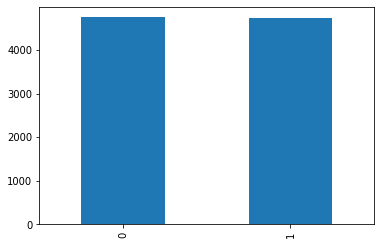

In [10]:
df['category'].value_counts().plot.bar()

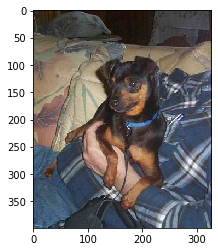

In [11]:
sample = random.choice(filenames)
image = load_img("../Data/Train/Labeled_Images/"+sample)
plt.imshow(image)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [14]:
earlystop = EarlyStopping(patience=10)

In [15]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [16]:
callbacks = [earlystop, learning_rate_reduction]

In [17]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [18]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

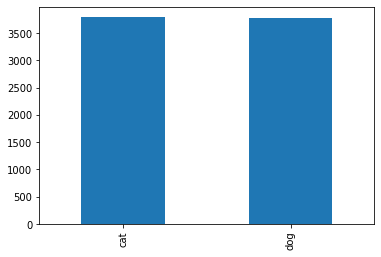

In [19]:
train_df['category'].value_counts().plot.bar()

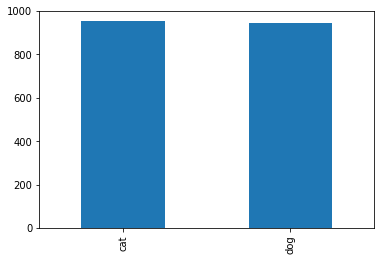

In [20]:
validate_df['category'].value_counts().plot.bar()

In [21]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../Data/Train/Labeled_Images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 7576 validated image filenames belonging to 2 classes.


In [23]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../Data/Train/Labeled_Images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1895 validated image filenames belonging to 2 classes.


In [24]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../Data/Train/Labeled_Images/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


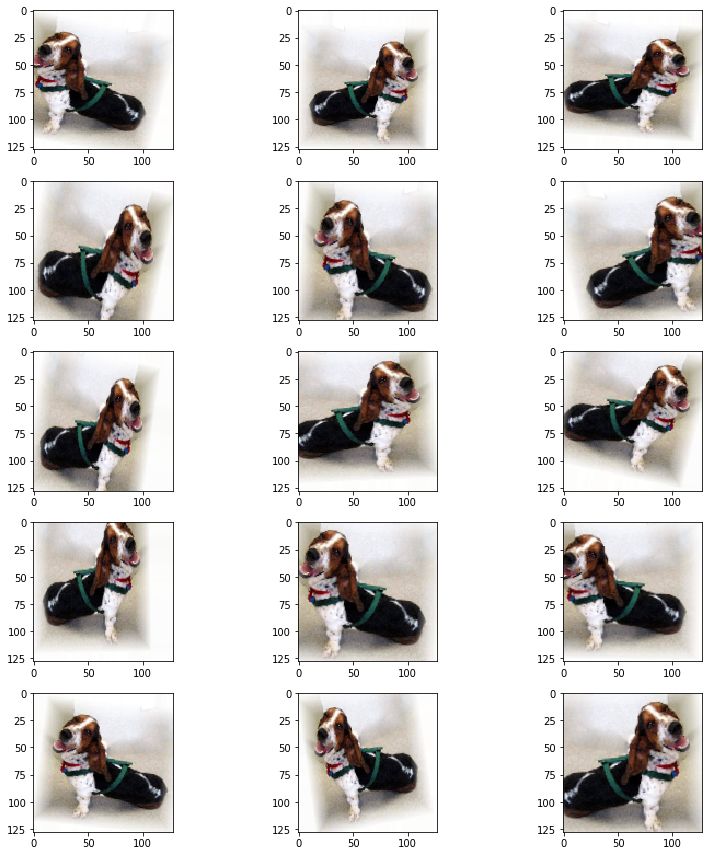

In [25]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [26]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
505/505 [==============================] - 388s 768ms/step - loss: 0.9433 - accuracy: 0.5848 - val_loss: 0.7079 - val_accuracy: 0.6106 - lr: 0.0010
Epoch 2/50
505/505 [==============================] - 406s 803ms/step - loss: 0.6384 - accuracy: 0.6567 - val_loss: 0.6618 - val_accuracy: 0.6603 - lr: 0.0010
Epoch 3/50
505/505 [==============================] - 396s 784ms/step - loss: 0.5978 - accuracy: 0.6974 - val_loss: 0.5695 - val_accuracy: 0.7254 - lr: 0.0010
Epoch 4/50
505/505 [==============================] - 413s 818ms/step - loss: 0.5668 - accuracy: 0.7117 - val_loss: 0.6172 - val_accuracy: 0.6603 - lr: 0.0010
Epoch 5/50
505/505 [==============================] - ETA: 0s - loss: 0.5488 - accuracy: 0.7250
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
505/505 [==============================] - 384s 761ms/step - loss: 0.5488 - accuracy: 0.7250 - val_loss: 0.6805 - val_accuracy: 0.6460 - lr: 0.0010
Epoch 6/50
505/505 [====================

505/505 [==============================] - 376s 745ms/step - loss: 0.3315 - accuracy: 0.8562 - val_loss: 0.3149 - val_accuracy: 0.8688 - lr: 1.0000e-05


In [27]:
model.save_weights("model_cats_dogs.h5")

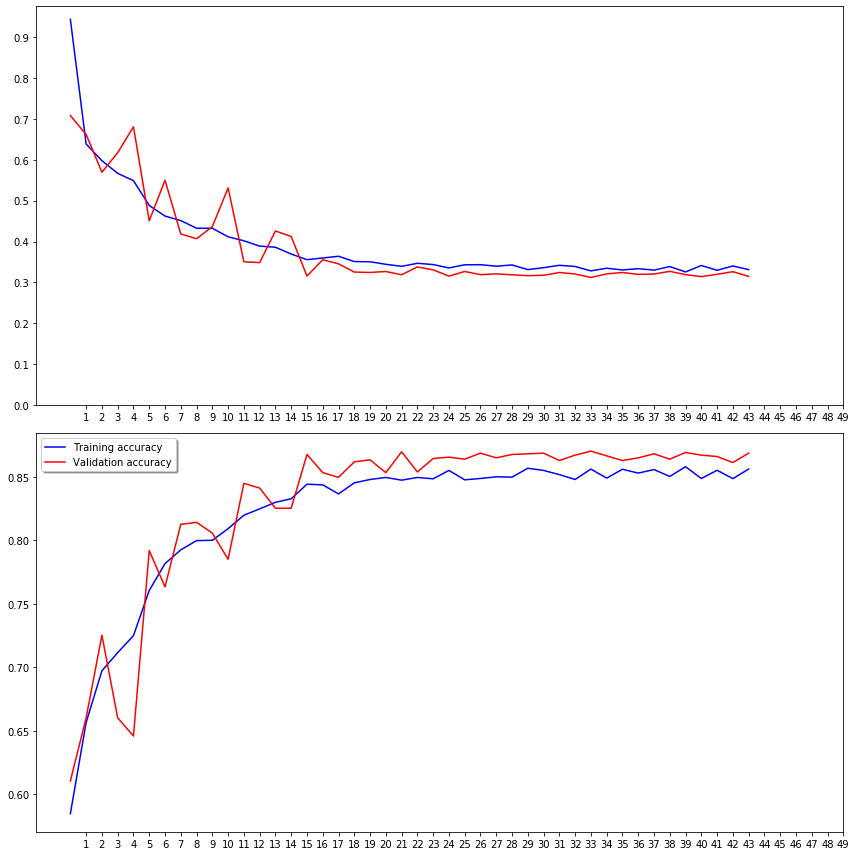

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [29]:
test_filenames = os.listdir("../Data/Test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [30]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../Data/Test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 4059 validated image filenames.


In [31]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [32]:
test_df['category'] = np.argmax(predict, axis=-1)

In [33]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [34]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

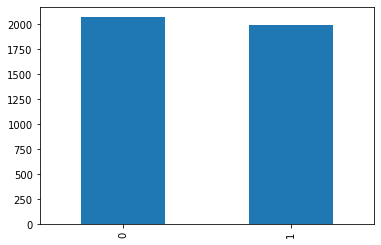

In [35]:
test_df['category'].value_counts().plot.bar()

In [41]:
print("Cats: ",(test_df['category']==0).sum())

Cats:  2070


In [43]:
print("Dogs: ",(test_df['category']==1).sum())

Dogs:  1989


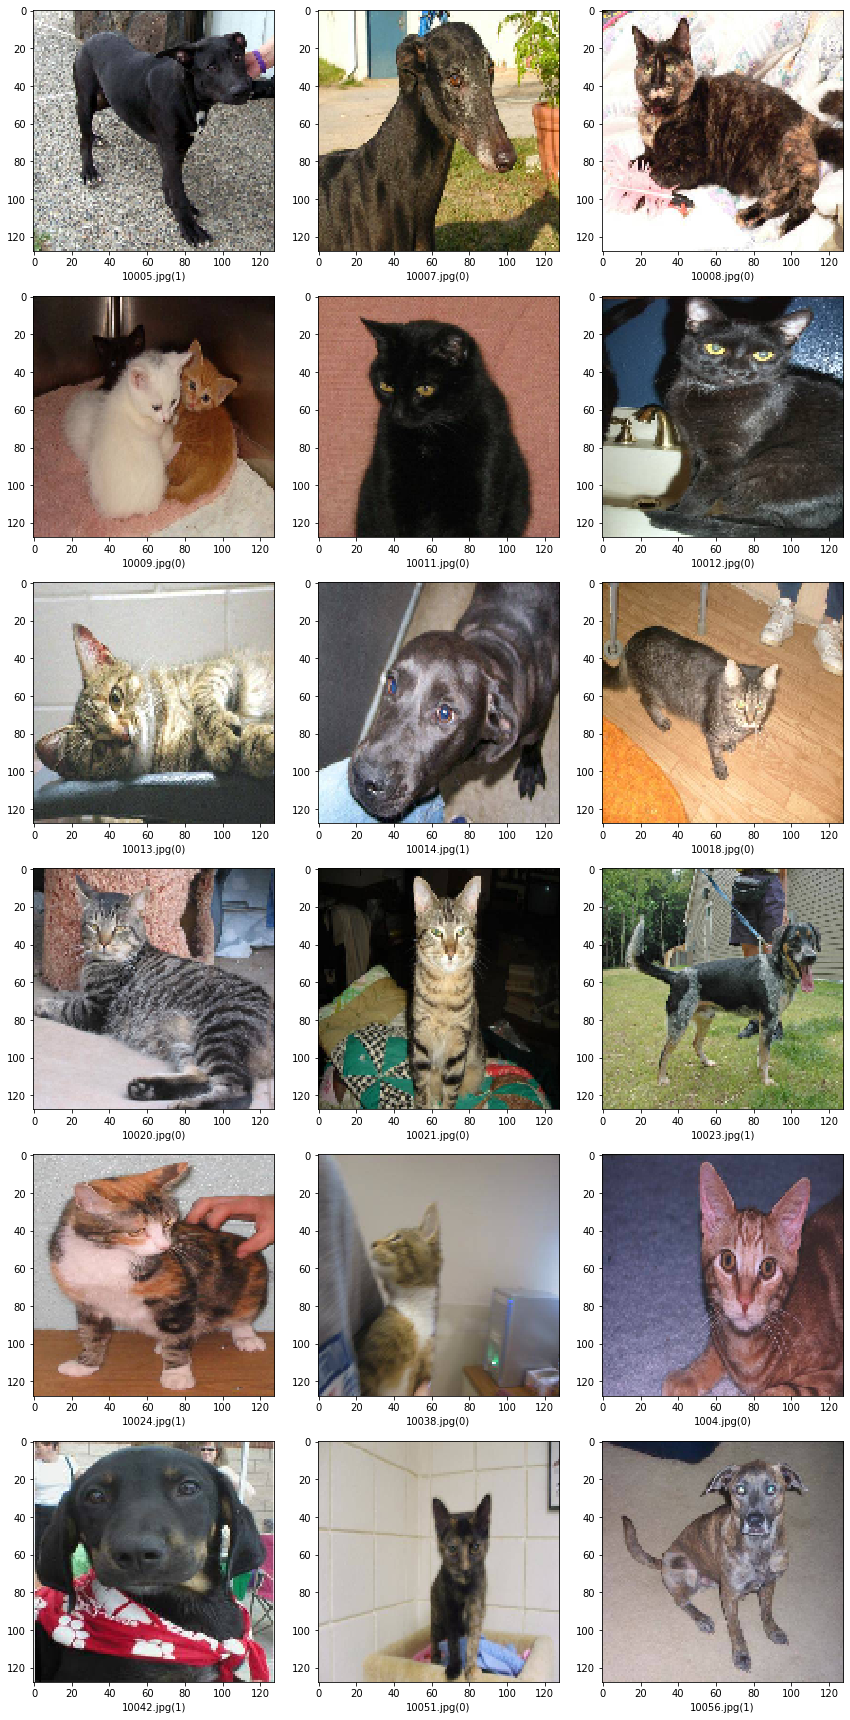

In [36]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../Data/Test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [37]:
submission_df = test_df.copy()
#submission_df['File_Name'] = submission_df['filename'].str.split('.').str[0]
submission_df['File_Name'] = submission_df['filename']
submission_df['Category'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_v3.csv', index=False)

In [55]:
nb_train_samples = train_df.shape[0]
nb_train_samples

7576

In [56]:
nb_validation_samples = validate_df.shape[0]
nb_validation_samples

1895

In [57]:
from keras import applications

In [61]:
def save_bottlebeck_features():
    
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    train_generator = datagen.flow_from_dataframe(
        train_df, 
        "../Data/Train/Labeled_Images/",
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        shuffle=False)
    
    bottleneck_features_train = model.predict(
        train_generator, nb_train_samples // batch_size)
    
    np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

    validation_generator = datagen.flow_from_dataframe(
        validate_df, 
        "../Data/Train/Labeled_Images/",
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        shuffle=False)
    
    bottleneck_features_validation = model.predict(
        validation_generator, nb_validation_samples // batch_size)
    
    np.save(open('bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)


In [83]:
def train_top_model():
    
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

#     model.fit(train_generator,
#               epochs=epochs,
#               batch_size=batch_size,
#               validation_data=validation_generator)

    model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size
    )

    model.save_weights(top_model_weights_path)


In [63]:
save_bottlebeck_features()

Found 7576 validated image filenames belonging to 2 classes.
Found 1895 validated image filenames belonging to 2 classes.


In [84]:
train_top_model()

Epoch 1/50


InvalidArgumentError:  Incompatible shapes: [15] vs. [90]
	 [[node Equal (defined at <ipython-input-83-a8219f9b96f0>:30) ]] [Op:__inference_train_function_67429]

Function call stack:
train_function
